## Copyright Note


**This lecture mainly examples are adapted from wiki and internet resources. Also, most of figures are from Reference 1--chapter 14** 

## Deep Learning Reference 1
**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book**: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron  (Author)[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)


## Learning concepts:

1. Data Augmentation.
2. Transfer Learning.
3. Archtictures of pretrained models.

PS: A good article to calculate the parameters of [NN arhitectures](https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Data Augmentation:

Data augmentation artificially increases the size of the training set by generating many realistic variants of each training instance. This reduces overfitting, making this a regularization technique. The generated instances should be as realistic as possible:
ideally, given an image from the augmented training set, a human should not be able to tell whether it was augmented or not. Moreover, simply adding **white noise** ( the noise has the same amplitude, or intensity, throughout the audible frequency range (20 to 20,000 hertz). White noise is so named because it's analogous to white light, which is a mixture of all visible wavelengths of light.) will not help; the modifications should be learnable (white noise is not).
For example, you can slightly shift, rotate, and resize every picture in the training set by various amounts and add the resulting pictures to the training set (see
the below figure). This forces the model to be more tolerant to variations in the position, orientation, and size of the objects in the pictures. If you want the model to be more tolerant to different lighting conditions, you can similarly generate many images with
various contrasts. In general, you can also flip the pictures horizontally (except for text, and other non-symmetrical objects). By combining these transformations you can greatly increase the size of your training set.

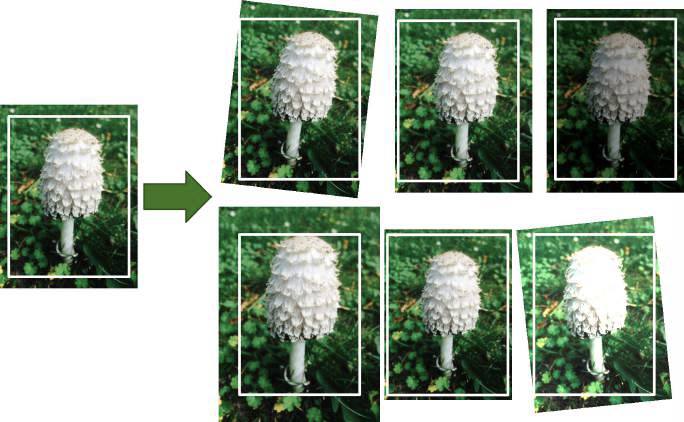

# [Transfer Learning(TL)](https://machinelearningmastery.com/transfer-learning-for-deep-learning/#:~:text=Transfer%20learning%20is%20a%20machine,model%20on%20a%20second%20task.&text=Common%20examples%20of%20transfer%20learning,your%20own%20predictive%20modeling%20problems)

[Transfer learning](https://www.deeplearningbook.org/) and domain adaptation refer to the situation where what has been learned in one setting is exploited to improve generalization in another setting.

TL two common approaches are as follows:

1. **Develop Model Approach**:
  - Select Source Task. 
  - Develop Source Model. 
  - Reuse Model.  
  - Tune Model.  
2. **Pre-trained Model Approach**:
  - Select a pre-trained source model. 
  - Reuse Model.  
  - Tune Model.  

**Transfer Learning with Image Data:**
  - Oxford VGG Model
  - Google Inception Model
  - Microsoft ResNet Model

**Transfer Learning with text Data:**
  - Google’s word2vec Model
  - Stanford’s GloVe Model

**Most of DL libraries embed these architectures** 


# MNIST Dataset

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

ImageNet Challenge: [LLSVRC](http://image-net.org/challenges/LSVRC/index)

# [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

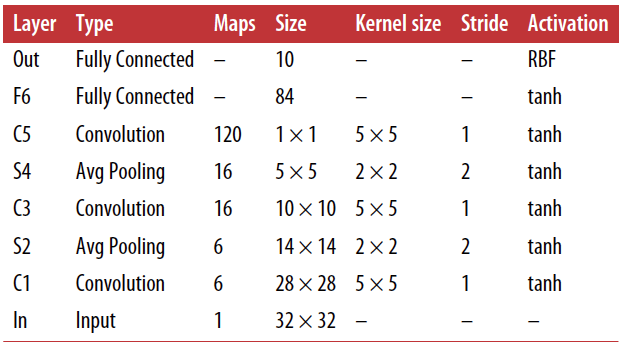



[Demo](http://yann.lecun.com/exdb/lenet/index.html)



# [AlexNet](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)

Besides the below architecture, it uses two main concepts:
1. Data Augumentation.
2. Local response normalization: AlexNet also uses a competitive normalization step immediately after the ReLU step
of layers C1 and C3, called local response normalization. The most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps (such competitive activation has been observed in biological neurons).



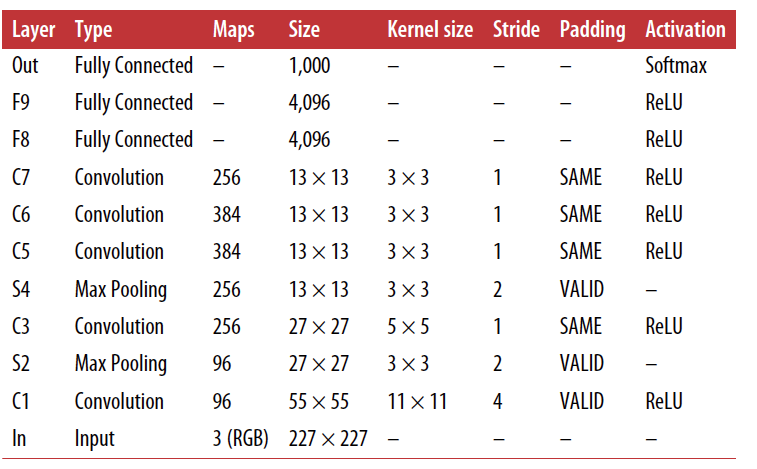

#[GoogLeNet](https://www.cv-foundation.org/openaccess/content_cvpr_2015/html/Szegedy_Going_Deeper_With_2015_CVPR_paper.html)

# Inception Module:

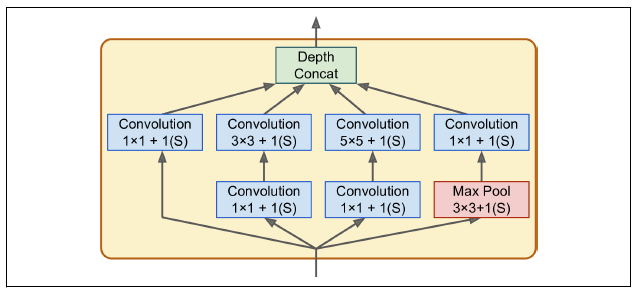

## General Architecture:

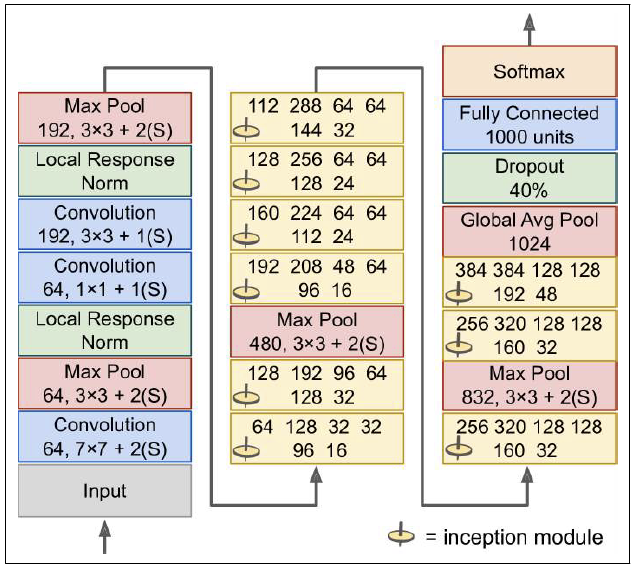

# [Residual Network](https://arxiv.org/abs/1512.03385)

## [Good article](https://www.mygreatlearning.com/blog/resnet/)

It is the refernce for the conceptual view of RN.

## Problem: 
To solve a complex problem, we stack some additional layers in the Deep Neural Networks which results in improved accuracy and performance. The intuition behind adding more layers is that these layers progressively learn more complex features.

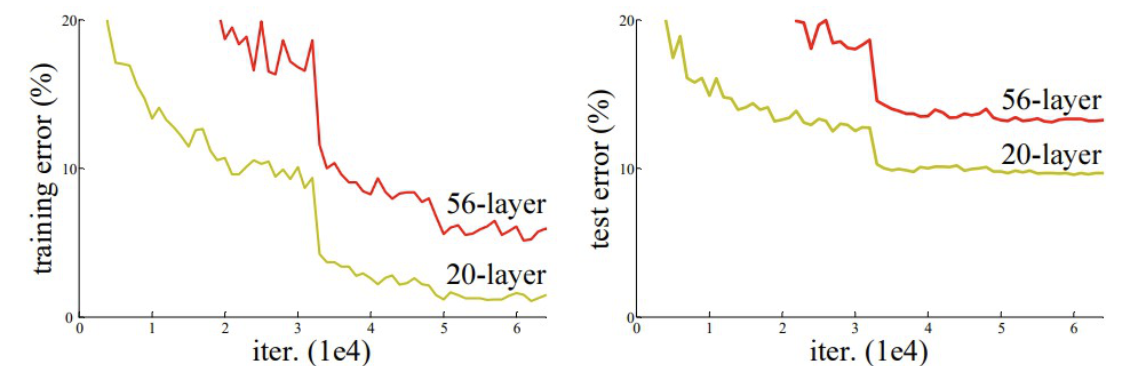




# Residual Block
This problem of training very deep networks has been alleviated with the introduction of ResNet or residual networks and these Resnets are made up from Residual Blocks.
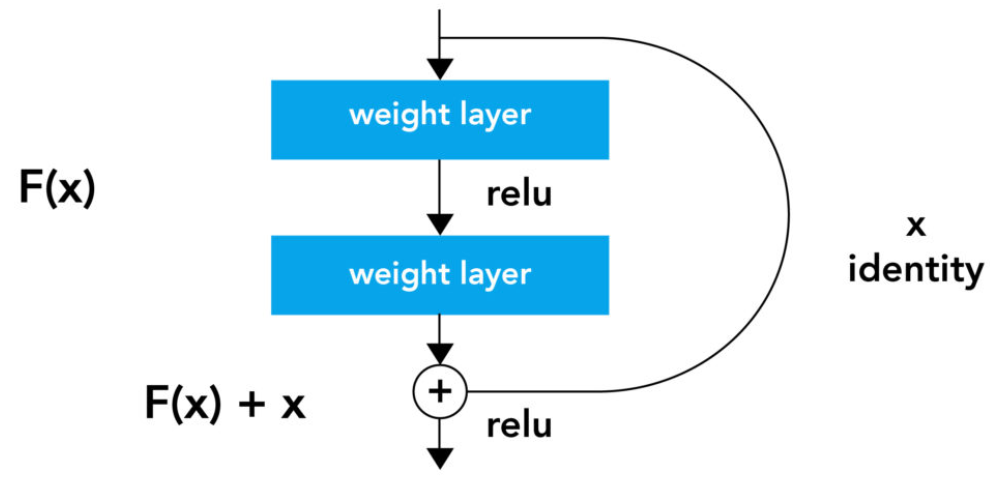

There appears to be a slight problem with this approach when the dimensions of the input vary from that of the output which can happen with convolutional and pooling layers. In this case, when dimensions of f(x) are different from x, we can take two approaches:

  - The skip connection is padded with extra zero entries to increase its dimensions.
  - The projection method is used to match the dimension which is done by adding 1×1 convolutional layers to input. In such a case, the output is:


## How ResNet helps

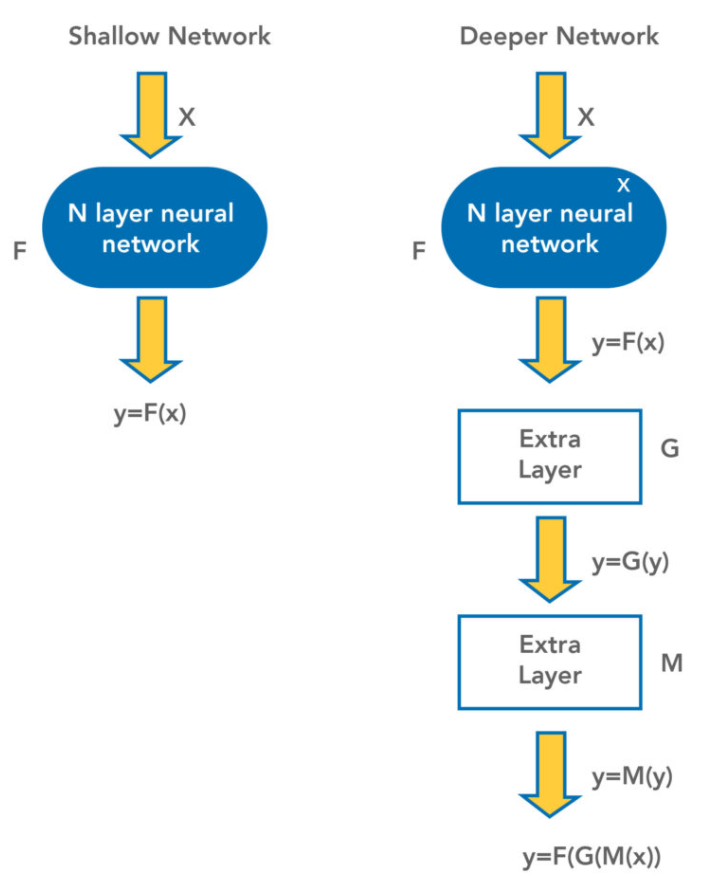

# ResNet Architecture

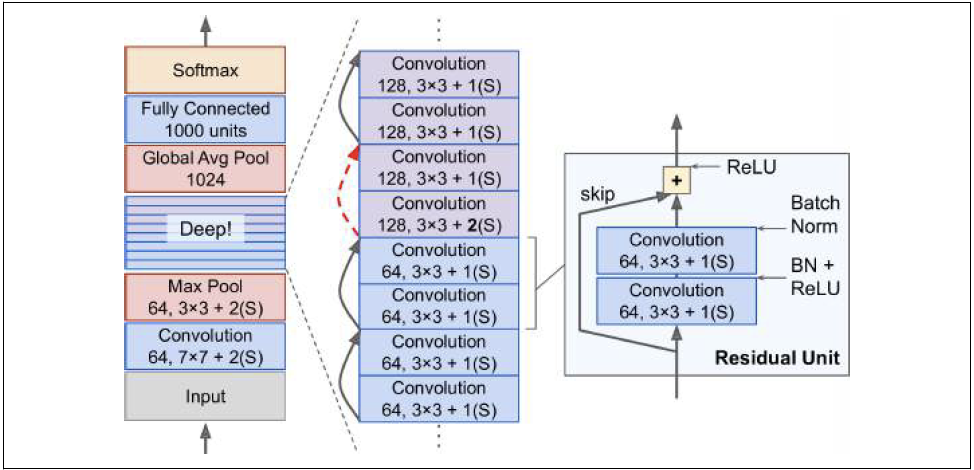

In [ ]:
#ResNet-34 

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
print([64] * 3 + [128] * 4 + [256] * 6 + [512] * 3)

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()